In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.callbacks import *

In [3]:
torch.cuda.is_available()

True

In [4]:
tfms = get_transforms(do_flip=True,flip_vert=False,max_rotate=10.0,max_zoom=1.1,max_lighting=0.2,max_warp=0.2,p_affine=0.75,p_lighting=0.75)


In [5]:
src = (ImageList.from_folder(path='train').split_by_rand_pct(0.2).label_from_folder())

In [6]:
src

LabelLists;

Train: LabelList (65934 items)
x: ImageList
Image (3, 375, 500),Image (3, 500, 375),Image (3, 352, 500),Image (3, 800, 440),Image (3, 500, 375)
y: CategoryList
class-857,class-857,class-857,class-857,class-857
Path: train;

Valid: LabelList (16483 items)
x: ImageList
Image (3, 333, 500),Image (3, 281, 500),Image (3, 2000, 1500),Image (3, 240, 320),Image (3, 500, 375)
y: CategoryList
class-561,class-872,class-854,class-204,class-966
Path: train;

Test: None

In [7]:
data = src.transform(tfms,size=256).databunch(bs=32).normalize(imagenet_stats)

In [8]:
data.c

45

In [9]:
learn = cnn_learner(data, models.densenet161, metrics=[error_rate, accuracy, FBeta(beta=1,average='macro')])

/home/ubuntu/anaconda3/envs/snakes_breed/lib/python3.6/site-packages/torchvision/models/densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)


In [10]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


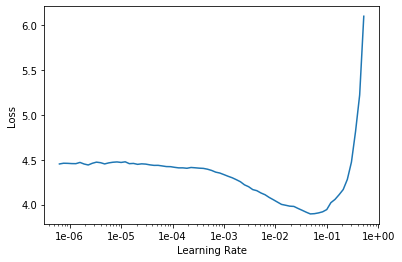

In [11]:
learn.recorder.plot()

In [12]:
lr=5e-3

In [13]:
learn.fit_one_cycle(2,lr)

epoch,train_loss,valid_loss,error_rate,accuracy,f_beta,time
0,1.756376,1.565513,0.456531,0.543469,0.440522,11:38
1,1.317756,1.133917,0.337985,0.662015,0.617688,11:37


/home/ubuntu/anaconda3/envs/snakes_breed/lib/python3.6/site-packages/fastai/metrics.py:186: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")


In [14]:
learn.save('densenet161-256-5e3-2')

In [15]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


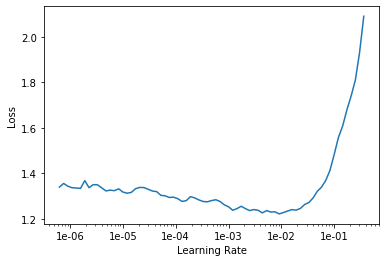

In [16]:
learn.recorder.plot()

In [17]:
learn.fit_one_cycle(5,slice(1e-6,lr/10))

epoch,train_loss,valid_loss,error_rate,accuracy,f_beta,time
0,1.252442,1.121718,0.334708,0.665291,0.600654,11:37
1,1.196899,1.095297,0.326397,0.673603,0.633868,11:38
2,1.263873,1.080339,0.324334,0.675666,0.635002,11:35
3,1.169756,1.066253,0.320209,0.679791,0.637288,11:37
4,1.175510,1.068782,0.320876,0.679124,0.638129,11:38


In [18]:
learn.save('densenet161-256-slice-5')

In [19]:

learn.unfreeze()

In [20]:
lrs = [1e-6,1e-6,1e-8]

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


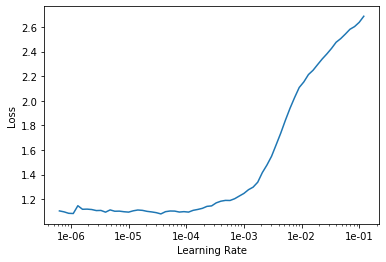

In [21]:
learn.lr_find()
learn.recorder.plot()

In [22]:
learn.fit_one_cycle(2,lrs)

epoch,train_loss,valid_loss,error_rate,accuracy,f_beta,time
0,1.154648,1.060850,0.319299,0.680701,0.620999,13:49
1,1.150801,1.057555,0.316569,0.683431,0.643083,13:50


In [23]:
learn.save('densenet161-256-unfreeze-2-dlr')